<a href="https://colab.research.google.com/github/WyvernCore/ICS3206---Machine-Learning-Expert-Systems-and-Fuzzy-Logic/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

### Uploading csv file to Google Colab

In [2]:
from google.colab import files 
uploaded = files.upload() #Used to upload csv file into Google Colab session

Saving voice.csv to voice (5).csv


### Checking CSV file contents

In [3]:
df = pd.read_csv('voice.csv') #loading the csv file using panda

In [4]:
df.head() #checking the head of the csv file

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
def unique(col):
   return df[col].nunique() #return count number of distinct elements in specified axis

TotalUnique = {} #create a dict to store the total amount of unique elements in csv ex label 2 {male, female}
for i in df.columns:
    value = unique(i)
    TotalUnique [i] = value

for key,value in TotalUnique.items():
    print(key, value)

meanfreq 3166
sd 3166
median 3077
Q25 3103
Q75 3034
IQR 3073
skew 3166
kurt 3166
sp.ent 3166
sfm 3166
mode 2825
centroid 3166
meanfun 3166
minfun 913
maxfun 123
meandom 2999
mindom 77
maxdom 1054
dfrange 1091
modindx 3079
label 2


In [6]:
x = df.iloc[:,:-1]
print(x) #get each value of each row without excluding the label

y = df.label #get the label of each row 
print(y)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm      mode  ce

In [7]:
df['label'].value_counts() #print the amount of rows for the two designated labels 

male      1584
female    1584
Name: label, dtype: int64

### Splitting data into training and testing 

In [8]:
( x_train, 
  x_test,
  y_train,
  y_test  ) = train_test_split(x,y,test_size=0.33) #Using sk learn to split into 80% training and 20% testing

In [9]:
y_train.value_counts() #labels for training

female    1070
male      1052
Name: label, dtype: int64

In [10]:
y_test.value_counts() #labels for testing

male      532
female    514
Name: label, dtype: int64

### Decision Tree Classifier

In [11]:
model = DecisionTreeClassifier(ccp_alpha=0.001, splitter="best", criterion="gini", max_features="sqrt") #creating the DTC class with hyperparamas
model.fit(x_train,y_train) #fitting the model with the values and labels 

DecisionTreeClassifier(ccp_alpha=0.001, max_features='sqrt')

In [12]:
model.get_params() #get the default paramaters 

{'ccp_alpha': 0.001,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

List of paramaters:

1.   max_depth -> How deep the tree can be
2.   criterion -> Function to measure quality of split either Gini or Entropy 
3.   splitter -> Strategy to choose split of each node to be either the best or random
4.   max_features -> number of features to consider each time to make the split decision
5.   random_state -> Controls the randomness of the estimator
6.   class_weight -> determines the weight (importance of a label)
7.   ccp_alpha -> Pruning of tree



In [13]:
predictions = model.predict(x_test)
predictions #models predictions for each row

array(['male', 'female', 'male', ..., 'male', 'female', 'male'],
      dtype=object)

In [14]:
probabilityPredict = model.predict_proba(x_test) #Predict the probability of each label
probabilityPredict #Since no early stopping is met then probabities are full

array([[0.01149425, 0.98850575],
       [0.99582754, 0.00417246],
       [0.00336323, 0.99663677],
       ...,
       [0.00336323, 0.99663677],
       [0.99582754, 0.00417246],
       [0.00336323, 0.99663677]])

DTC Evaluation

In [15]:
pd.crosstab(predictions,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,497,17,514
male,17,515,532
All,514,532,1046


In [16]:
print("\t\t\tDecision Tree Class report:\n", classification_report(predictions,y_test)) #Printing the DTC's Precision, Recall and f1-score

			Decision Tree Class report:
               precision    recall  f1-score   support

      female       0.97      0.97      0.97       514
        male       0.97      0.97      0.97       532

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [17]:
print("Decision Tree Accuracy score: ", accuracy_score(predictions,y_test)*100,"%") #Printing DTC's accuracy score

Decision Tree Accuracy score:  96.74952198852772 %


In [18]:
feature_names = df.columns[:-1] #features names excluding labels
feature_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [19]:
feature_importance = pd.DataFrame(model.feature_importances_, index=feature_names).sort_values(by=[0], ascending=False) #Give feature importance with the highest being the most important 
feature_importance

,0
meanfun,0.895776
IQR,0.041010
dfrange,0.011137
meandom,0.009335
Q25,0.008753
maxdom,0.007126
meanfreq,0.005774
mindom,0.004035
sd,0.003409
minfun,0.003209


In [20]:
features = list(feature_importance[feature_importance[0]>0].index) #Which features dont have an importance of zero
features

['meanfun',
 'IQR',
 'dfrange',
 'meandom',
 'Q25',
 'maxdom',
 'meanfreq',
 'mindom',
 'sd',
 'minfun',
 'sfm',
 'sp.ent',
 'mode',
 'median']

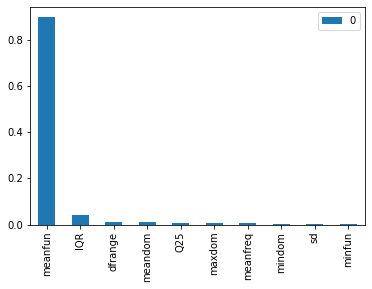

In [21]:
feature_importance.head(10).plot(kind='bar') #Bar chart with importance of features

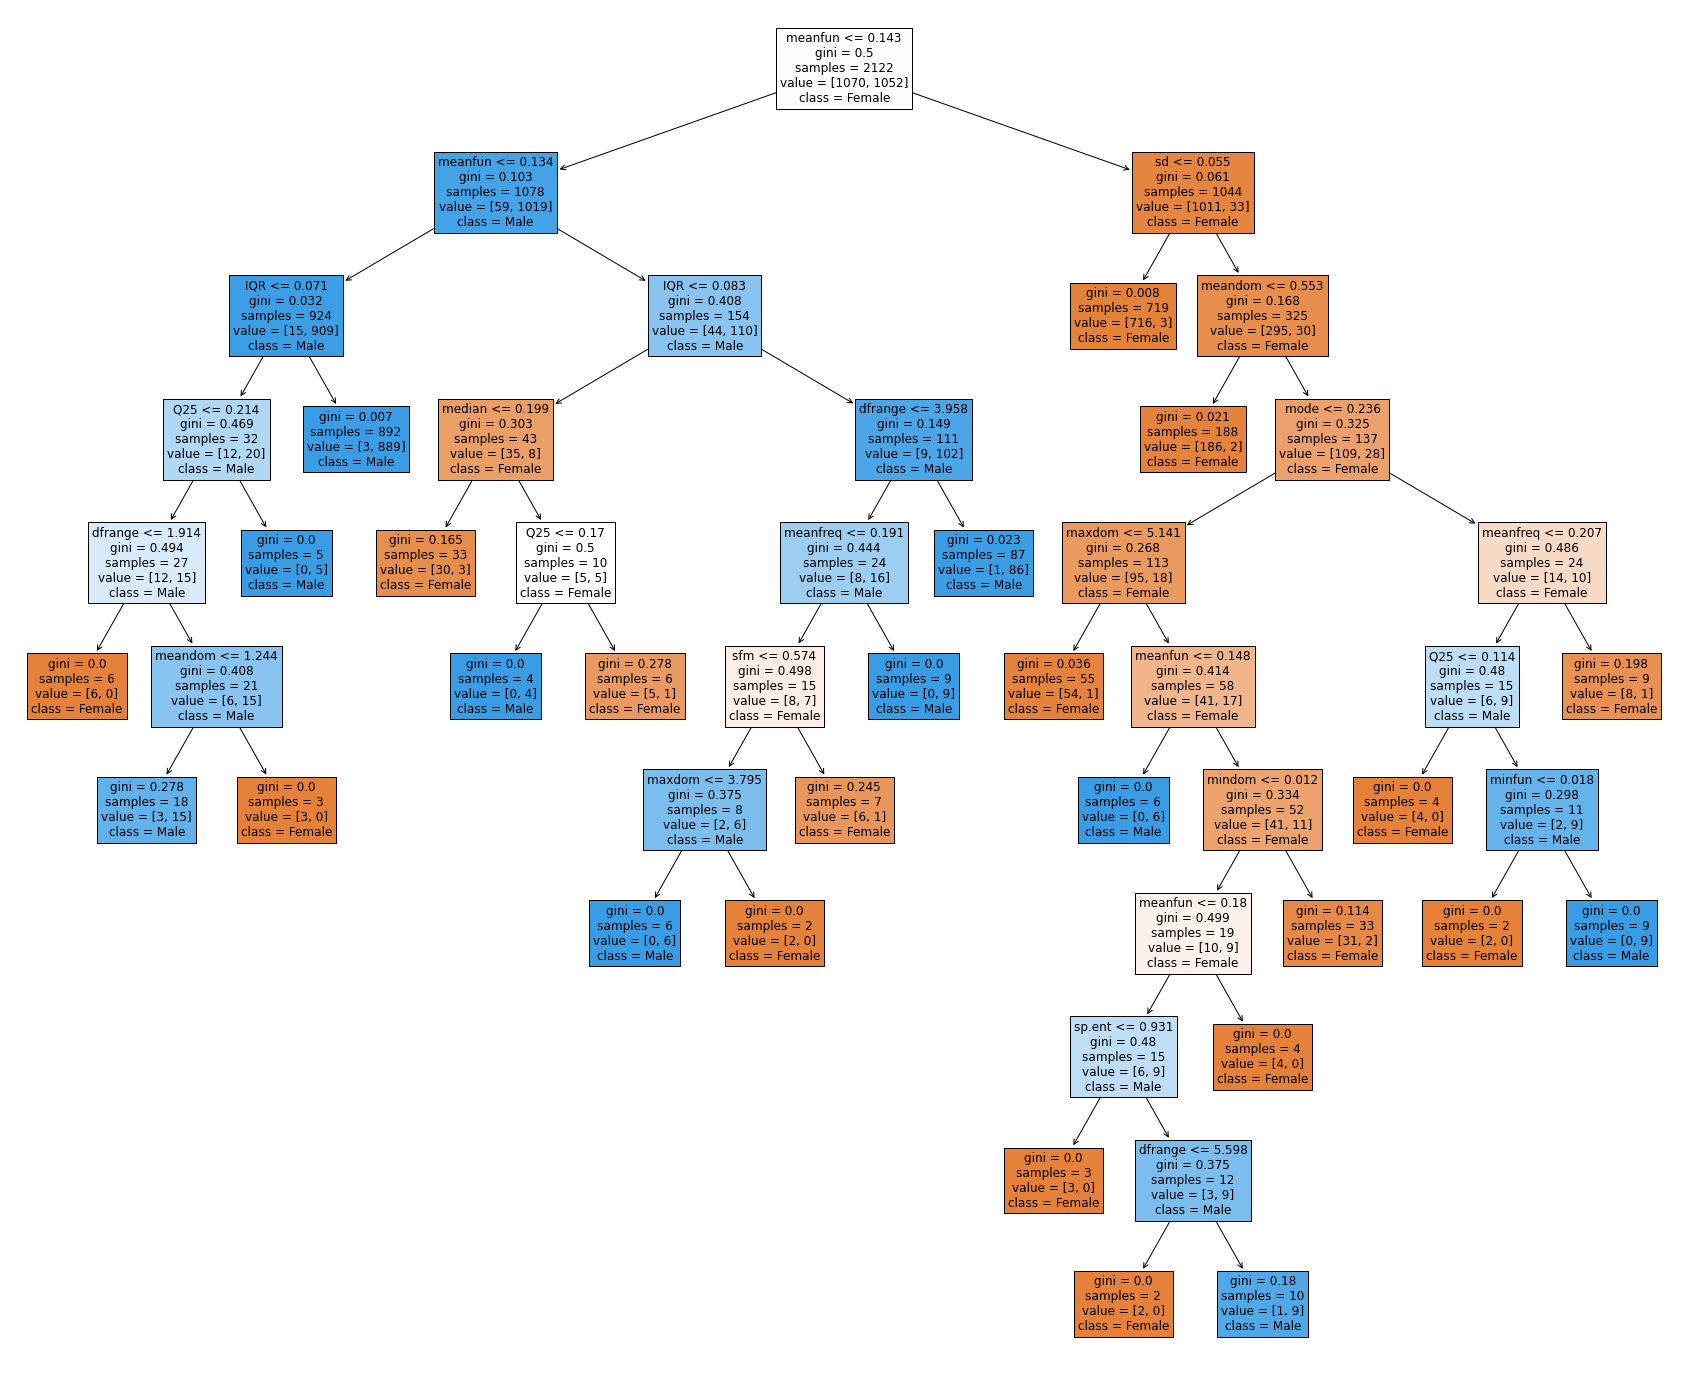

In [24]:
fig = plt.figure(figsize=(30,25)) #Plotting the Decision Tree
_ = tree.plot_tree(model,
                   feature_names=feature_names,
                   class_names={0:'Female', 1:'Male'},
                   filled=True,
                   fontsize=12
                  )